In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
data=load_wine()

In [ ]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
df=scaler.fit_transform(df)

In [ ]:
df=pd.DataFrame(df,columns=data.feature_names)

In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(df)

In [ ]:
pca_data

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    labels=kmeans.fit_predict(pca_data)
    score=silhouette_score(pca_data,labels)
    print(f"for k={k} silhouette score is {score}")

for k=2 silhouette score is 0.4750102141135033
for k=3 silhouette score is 0.5609305721582905
for k=4 silhouette score is 0.4855976780800213
for k=5 silhouette score is 0.43472272990179595
for k=6 silhouette score is 0.41160507596437523
for k=7 silhouette score is 0.44278472393501983
for k=8 silhouette score is 0.4002186401470443
for k=9 silhouette score is 0.4019372365993589
for k=10 silhouette score is 0.4059278718172256


In [ ]:
# the highest silhouette_score is :for k=3 silhouette score is 0.5601697480957202

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_labels=kmeans.fit_predict(pca_data)

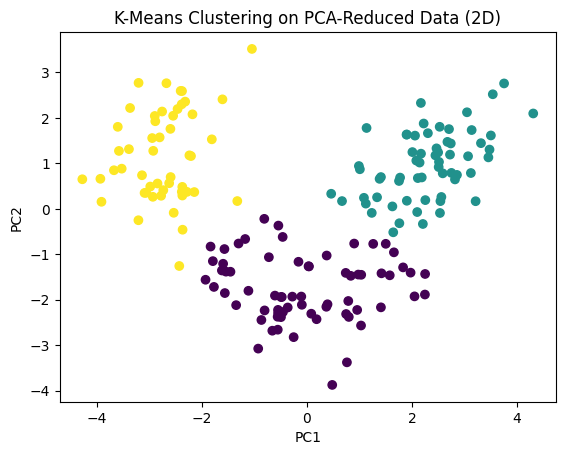

In [ ]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=y_labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering on PCA-Reduced Data (2D)")
plt.show()

**Alternate way to find k**

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(pca_data)
  wcss.append(kmeans.inertia_)


In [ ]:
kl=KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(3)

# ***Final Result***

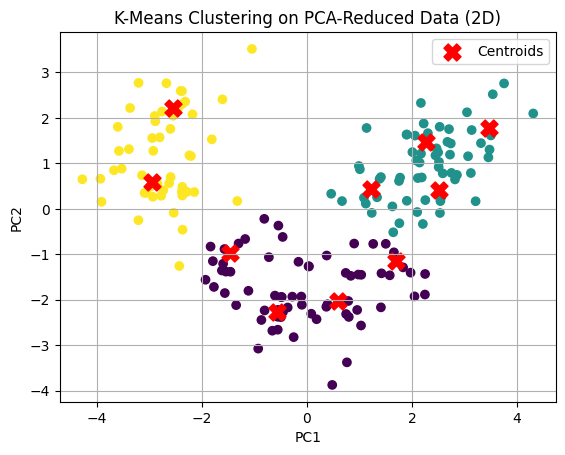

In [ ]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=y_labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering on PCA-Reduced Data (2D)")


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, marker='X', label='Centroids')

plt.legend()
plt.grid(True)
plt.show()

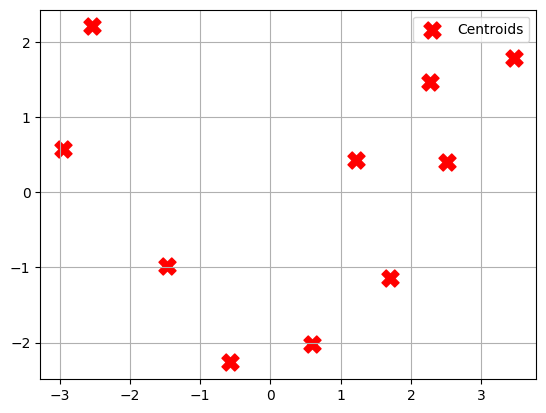

In [ ]:
# Plot centroids (projected into PCA space)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, marker='X', label='Centroids')

plt.legend()
plt.grid(True)
plt.show()